<a href="https://colab.research.google.com/github/santhoshsrivi/study/blob/main/COVID_19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('/content/COVID-19 Coronavirus.csv')

In [3]:
print(f'The shape of the dataframe is : {df.shape}')

The shape of the dataframe is : (225, 10)


In [4]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [6]:
df.columns

Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop',
       'Tot Deaths/1M pop', 'Death percentage'],
      dtype='object')

In [7]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()
cat_columns = df.select_dtypes(include='object').columns.tolist()

In [8]:
num_columns

['Population',
 'Total Cases',
 'Total Deaths',
 'Tot\xa0Cases//1M pop',
 'Tot\xa0Deaths/1M pop',
 'Death percentage']

In [9]:
cat_columns

['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Continent']

In [10]:
df.isna().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [11]:
df.head(5)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [12]:
df = df.drop(['Other names','ISO 3166-1 alpha-3 CODE'],axis=1)

In [13]:
df.head(10)

,Country,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,34654212,Africa,99194,1900,2862,55,1.915438
5,Anguilla,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333
6,Antigua and Barbuda,99348,Latin America and the Caribbean,7493,135,75422,1359,1.801682
7,Argentina,45921761,Latin America and the Caribbean,9041124,128065,196881,2789,1.416472
8,Armenia,2972939,Asia,422574,8617,142140,2898,2.039169
9,Aruba,107560,Latin America and the Caribbean,34051,212,316577,1971,0.622596


In [14]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Latin America and the Caribbean',
       'Oceania', 'Northern America'], dtype=object)

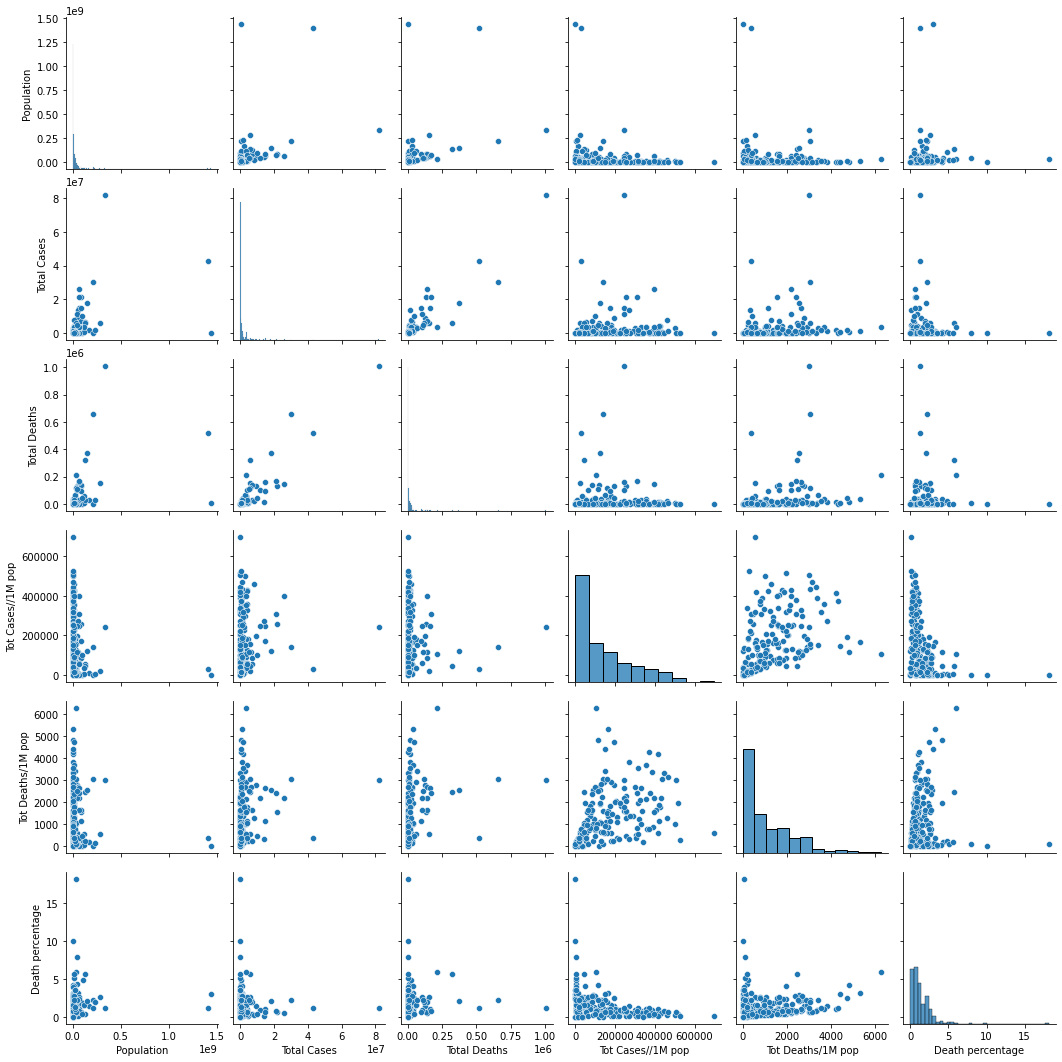

In [15]:
sns.pairplot(df)
plt.show()

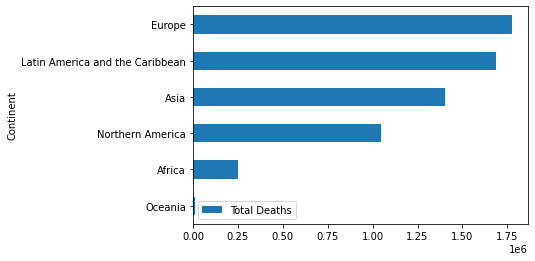

In [16]:
pd.DataFrame(df.groupby('Continent')['Total Deaths'].sum().sort_values()).plot(kind='barh')

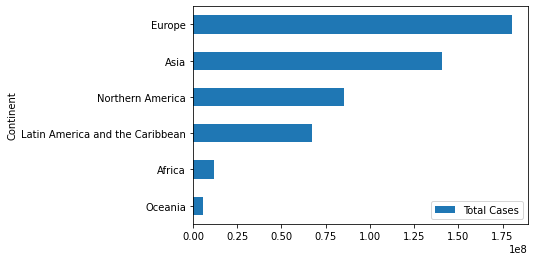

In [17]:
pd.DataFrame(df.groupby('Continent')['Total Cases'].sum().sort_values()).plot(kind='barh')

In [18]:
df_cont = df[["Country","Death percentage","Continent"]]
df_cont = df.groupby('Continent').sum()
df_cont = df_cont.reset_index()
df_cont = df_cont.sort_values(by='Death percentage',ascending=False)
df_cont

,Continent,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Africa,1396751613,11764207,252873,1782060,17843,115.517859
1,Asia,4668689344,140957179,1405003,5015344,30847,76.218998
3,Latin America and the Caribbean,661325824,67509231,1686828,6943019,75380,74.150978
2,Europe,748420351,180332483,1775727,14596188,110071,47.586433
5,Oceania,43437948,5647957,9336,1375938,6009,7.899474
4,Northern America,372846593,85364770,1046062,1090035,6611,3.554359


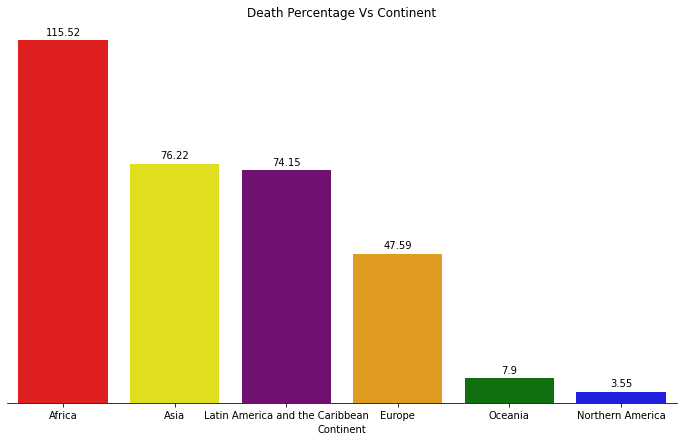

In [32]:
plt.figure(figsize=(12,7))
color = ['red','yellow','purple','orange','green','blue']
ax = sns.barplot(x=df_cont['Continent'],y=df_cont['Death percentage'].round(2),palette=color)
ax.set_title('Death Percentage Vs Continent')
#ax.legend (fontsize= 10, bbox_to_anchor=(1.1, 0.5))
ax.xaxis.set_tick_params(labelsize=10)
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, 
                str(height), ha='center', va='bottom', fontsize = 10)